# DoE module for FAST-OAD

*Author: Félix Pollet* <br>
*Date: May 2023*

The `doe_fast` module offers the capability of running design of experiments on a FAST-OAD problem.

Various generators are available:
* The `List` generator reads cases from a user-defined array of DoE cases
* The `Uniform` generator creates random samples drawn from a uniform distribution
* The `Latin Hypercube` generator instanciates a [latin hypercube sampling](https://en.wikipedia.org/wiki/Latin_hypercube_sampling)
* The `Sobol` generator instanciates the [Sobol-Saltelli 2002 method provided by SALib](https://salib.readthedocs.io/en/latest/api.html#sobol-sensitivity-analysis). It is useful for performing a Sobol analysis, which is a form of [variance-based sensitivity analysis](https://en.wikipedia.org/wiki/Variance-based_sensitivity_analysis).
* The `Morris` generator instanciates the [method of Morris provided by SALib](https://salib.readthedocs.io/en/latest/api.html#method-of-morris). The [method of Morris](https://en.wikipedia.org/wiki/Morris_method) is a one-step-at-a-time method (OAT) for sensitivity analysis.

The examples below show some applications of the module.

In [3]:
import os.path as pth
import fastoad.api as oad
from fastuav.utils.postprocessing.sensitivity_analysis.sensitivity_analysis import doe_fast
import numpy as np

DATA_FOLDER_PATH = "../data/doe"
WORK_FOLDER_PATH = "./workdir"

CONFIGURATION_FILE = pth.join(WORK_FOLDER_PATH, "conf_file_doe.yaml")
SOURCE_FILE = pth.join(DATA_FOLDER_PATH, "problem_inputs_doe.xml")

## Example 1: running a model for many different input values

In [ ]:
# Generate the configuration file for the problem to be evaluated
oad.generate_configuration_file(
    CONFIGURATION_FILE, overwrite=True, distribution_name="fastuav", sample_file_name="doe_simple_model.yaml"
)

In [ ]:
# Generate the inputs file and display data
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

In [ ]:
INPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_inputs.xml")
oad.variable_viewer(INPUT_FILE)

In [ ]:
# Definition of the DoE

# Inputs to be varied
x_dict = {
    "lca:parameters:n_cycles_uav": np.linspace(1.0, 10000.0, 100),  # DoE provided as a list
         }

# Outputs to observe
y_list = [
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:airframe',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:airframe:efficiency',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:airframe:mass',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:airframe:production',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:batteries',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:batteries:efficiency',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:batteries:mass',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:batteries:production',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:controllers',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:controllers:efficiency',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:controllers:mass',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:controllers:production',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:motors',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:motors:efficiency',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:motors:mass',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:motors:production',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:payload',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:payload:mass',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:propellers',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:propellers:efficiency',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:propellers:mass',
    'lca:postprocessing:aggregation:weighted_single_score:model_per_FU:propellers:production',
]

In [ ]:
# Run the DoE
method = "list"  # DoE provided as a list
df = doe_fast(method, x_dict, y_list, CONFIGURATION_FILE)

*Example of output*

<img src="../data/doe/contribution_motor_n_cycles.png"  width="600" height="300">

## Example 2: DoE on the optimization problem

Sometimes you may want to run a DoE on an optimization problem rather than a model. The `doe_fast` module automatically detects if an optimization problem is defined in the configuration file, and each point of the DoE will run an optimization.

In [4]:
# Configuration file with an optimization problem
oad.generate_configuration_file(
    CONFIGURATION_FILE, overwrite=True, distribution_name="fastuav", sample_file_name="doe_optimization_problem_2.yaml"
)

'D:\\THESE\\Tools\\FAST-UAV\\src\\fastuav\\notebooks\\workdir\\conf_file_doe.yaml'

In [5]:
# Generate the inputs file and display data
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)
INPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_inputs.xml")
oad.variable_viewer(INPUT_FILE)

In [52]:
# Definition of the DoE

# Inputs to be varied
x_dict = {
    "data:weight:propulsion:multirotor:battery:mass:reference": [0.5, 1.0],  # range of variation
    #"mission:sizing:main_route:cruise:distance": [5000, 30000]
    "mission:sizing:main_route:hover:duration": [10, 40]
         }

# Outputs to observe
#y_list = ["data:weight:mtow", "mission:operational:energy"]
y_list = ["data:weight:mtow", "data:weight:propulsion:multirotor:battery:mass", "data:propulsion:multirotor:battery:energy","data:performance:range:cruise", "data:performance:endurance:hover"]

# Run DoE
#method = "lhs"  # LHS sampling
method = "fullfactorial"  # full factorial sampling
n_samples = 10  # Number of samples
df = doe_fast(method, x_dict, y_list, CONFIGURATION_FILE, n_samples)

C:\Users\f.pollet.ISAE-SUPAERO\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



19 out of 100 optimizations failed.


In [67]:
df = df.drop(df[df.optim_failed == 1.0].index)

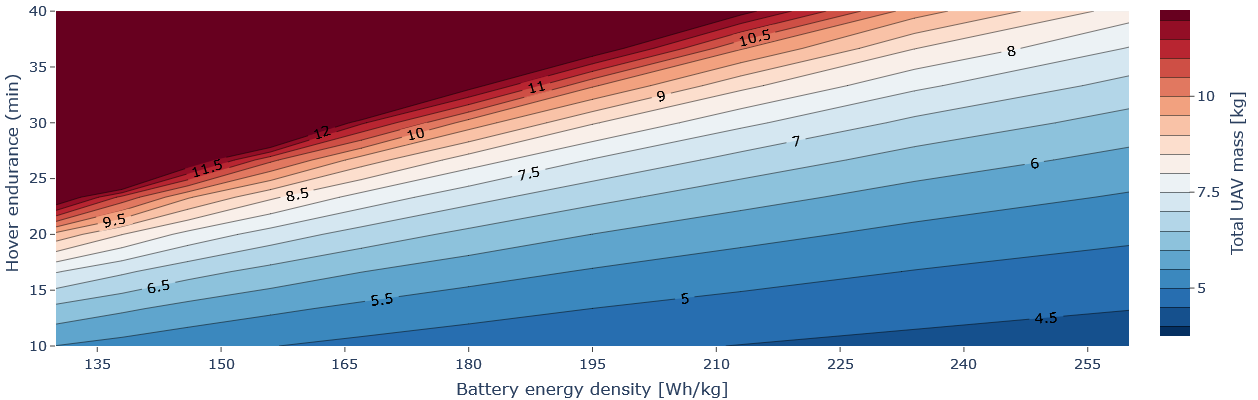

In [154]:
import plotly.graph_objects as go
import plotly

df["data:propulsion:multirotor:battery:energy:density"] = df["data:propulsion:multirotor:battery:energy"] / 3.6 / df["data:weight:propulsion:multirotor:battery:mass"]
#df["data:propulsion:multirotor:battery:energy:density:reference"] = df["data:propulsion:multirotor:battery:energy:reference"] / 3.6 / df["data:weight:propulsion:multirotor:battery:mass:reference"]
df["data:propulsion:multirotor:battery:energy:density"] = df["data:propulsion:multirotor:battery:energy:density"].astype(int)

# Set variables to plot
#x_name = list(x_dict.keys())[0]
#y_name = list(x_dict.keys())[1]
x_name = "data:propulsion:multirotor:battery:energy:density"
y_name = "mission:sizing:main_route:hover:duration"#  "data:performance:endurance:hover"
z_name = "data:weight:mtow"

# Reshape data into a grid
x_vals = sorted(df[x_name].unique())
y_vals = sorted(df[y_name].unique())
#y_vals = [val / 1000 for val in y_vals]
z_grid = df.pivot(index=y_name, columns=x_name, values=z_name).values

# Create the contour plot    
fig = go.Figure()
fig.add_trace(go.Contour(
    x=x_vals, y=y_vals, z=z_grid, 
    connectgaps=True,
    line_smoothing=0.0,
    contours=dict(start=4.0, end=12, size=0.5, showlabels=True),
    #contours=dict(start=df[z_name].min(), end=df[z_name].max(), size=0.00000025, showlabels=True),
    #contours_coloring='heatmap', # can also be 'lines', or 'none'
    colorbar=dict(
        title='Total UAV mass [kg]', # title here
        titleside='right',
        titlefont=dict(size=16),
        ticks='outside'
    ),
    colorscale='RdBu_r' # Blackbody,Bluered,Blues,Cividis,Earth,Electric,Greens,Greys,Hot,Jet,Picnic,Portland,Rainbow,RdBu,Reds,Viridis,YlGnBu,YlOrRd. (add '_r' for reversed)
))

#fig.add_trace(go.Scatter(x=df[x_name], y=df[y_name], mode='markers'))

# Update layout
fig.update_layout(title=None, width=600, height=400, paper_bgcolor='rgba(0,0,0,0)',  plot_bgcolor='rgba(0,0,0,0)', font=dict(size=14),
                 margin=dict(l=10, r=10, t=0, b=0))
fig.update_xaxes(title='Battery energy density [Wh/kg]', ticks='outside', dtick=15, range=[130,260])
fig.update_yaxes(title='Hover endurance (min)', ticks='outside', range=[10,41])

# Display the plot
fig.show()
plotly.io.write_image(fig, 'output_file.pdf', format='pdf')

In [131]:
df

,data:weight:propulsion:multirotor:battery:mass:reference,mission:sizing:main_route:hover:duration,data:performance:endurance:hover,data:performance:range:cruise,data:propulsion:multirotor:battery:energy,data:weight:mtow,data:weight:propulsion:multirotor:battery:mass,optim_failed,data:propulsion:multirotor:battery:energy:density
0,0.500000,10.000000,13.967163,9399.306698,596.228812,4.263218,0.634381,0.0,261
1,0.555556,10.000000,13.955677,9462.412633,610.454984,4.372410,0.721686,0.0,234
2,0.611111,10.000000,13.944101,9526.967745,625.403079,4.487261,0.813294,0.0,213
3,0.666667,10.000000,13.931764,9596.983901,641.090281,4.608153,0.909484,0.0,195
4,0.722222,10.000000,13.920130,9663.880977,657.671558,4.735775,1.010758,0.0,180
5,0.777778,10.000000,13.907845,9734.688971,674.346216,4.870581,1.116107,0.0,167
6,0.833333,10.000000,13.893756,9814.229153,689.175006,5.012800,1.222125,0.0,156
7,0.888889,10.000000,13.880126,9893.390607,705.732321,5.163084,1.334918,0.0,146
8,0.944444,10.000000,13.866601,9973.658042,723.584645,5.322244,1.454230,0.0,138
9,1.000000,10.000000,13.853147,10055.211744,742.818025,5.491207,1.580701,0.0,130


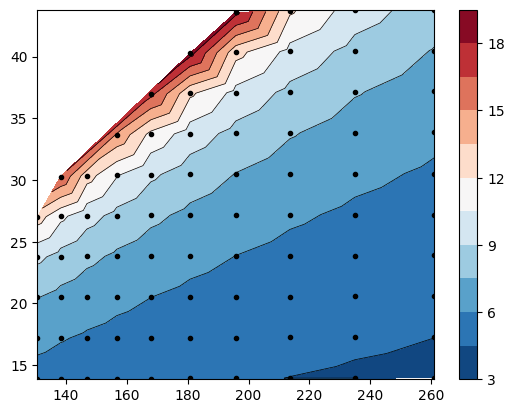

In [70]:
import matplotlib.pyplot as plt

def plot_contour(df, x_name, y_name, z_name, levels: int = None):
    """
    Contour plot from dataframe values.
    """
    # Get data
    x = df[x_name]
    y = df[y_name]
    z = df[z_name]
    
    # Initialize plot
    fig, ax = plt.subplots()

    # Plot contour
    ax.tricontour(x, y, z, levels=levels, linewidths=0.5, colors='k')
    cntr = ax.tricontourf(x, y, z, levels=levels, cmap="RdBu_r")
    fig.colorbar(cntr, ax=ax)
    
    # Data points
    ax.plot(x, y, 'ko', ms=3)
    
    return fig

fig = plot_contour(df, x_name, y_name, z_name, levels=10)

*Example of output*

<img src="../data/doe/payload_mass_doe.png"  width="600" height="300">

## Example 3 : Sobol analysis
The following example provides a more advanced example of what can be done using the `doe_fast` module. Ipywidget is used to set up an interactive interface to run a Sobol' analysis.

In [2]:
from fastuav.utils.postprocessing.sensitivity_analysis.sensitivity_analysis import sobol_analysis

# Generate the configuration file for the problem to be evaluated
oad.generate_configuration_file(
    CONFIGURATION_FILE, overwrite=True, distribution_name="fastuav", sample_file_name="doe_sobol_analysis.yaml"
)

'D:\\THESE\\Tools\\FAST-UAV\\src\\fastuav\\notebooks\\workdir\\conf_file_doe.yaml'

In [3]:
# Here we run a first optimization to get the optimal design
INPUT_FILE = oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)
problem = oad.optimize_problem(
    CONFIGURATION_FILE, overwrite=True
)
REFERENCE_DESIGN_FILE = pth.join(WORK_FOLDER_PATH, "problem_outputs.xml")
oad.variable_viewer(REFERENCE_DESIGN_FILE)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5621522065691114
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Optimization Complete
-----------------------------------


In [4]:
# Now, we carry out a sensitivity analysis around the optimal design
sobol_analysis(CONFIGURATION_FILE, REFERENCE_DESIGN_FILE)

    'data': [{'error_y': {'array': [], 'type': 'data'},
         …

![Alt Text](../data/doe/uncertainty.gif)